# 0. Imports and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # in order to always display every column

In [2]:
df = pd.read_csv("data/Specjalnosci_lozka.csv")

# 1. Data understanding

- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [3]:
df.shape

(51153, 11)

In [4]:
df.head

<bound method NDFrame.head of         Rok         Województwo         Powiat         Gmina  \
0      2017        dolnośląskie  bolesławiecki  Nowogrodziec   
1      2017        dolnośląskie  bolesławiecki   Bolesławiec   
2      2017        dolnośląskie  bolesławiecki   Bolesławiec   
3      2017        dolnośląskie  bolesławiecki   Bolesławiec   
4      2017        dolnośląskie  bolesławiecki   Bolesławiec   
...     ...                 ...            ...           ...   
51148  2023            opolskie       m. Opole         Opole   
51149  2023             śląskie    m. Katowice      Katowice   
51150  2023       wielkopolskie      m. Poznań        Poznań   
51151  2023       wielkopolskie      m. Poznań        Poznań   
51152  2023  zachodniopomorskie    m. Szczecin      Szczecin   

           Poziom sieci PSZ  \
0               Poza siecią   
1         Szpital I stopnia   
2         Szpital I stopnia   
3         Szpital I stopnia   
4         Szpital I stopnia   
...            

In [5]:
df.columns

Index(['Rok', 'Województwo', 'Powiat', 'Gmina', 'Poziom sieci PSZ',
       'Rodzaj Świadczeń', 'Nazwa Specjalności komórki',
       'Kod specjalności komórki', 'Liczba oddziałów', 'Liczba łóżek 31.12',
       'Średnioroczna liczba łóżek'],
      dtype='object')

In [6]:
df.dtypes

Rok                            int64
Województwo                   object
Powiat                        object
Gmina                         object
Poziom sieci PSZ              object
Rodzaj Świadczeń              object
Nazwa Specjalności komórki    object
Kod specjalności komórki      object
Liczba oddziałów              object
Liczba łóżek 31.12             int64
Średnioroczna liczba łóżek    object
dtype: object

In [7]:
df.describe()

,Rok,Liczba łóżek 31.12
count,51153.000000,51153.000000
mean,2019.996931,38.363244
std,2.000657,110.572200
min,2017.000000,0.000000
25%,2018.000000,14.000000
50%,2020.000000,24.000000
75%,2022.000000,39.000000
max,2023.000000,5618.000000


# 2. Data preparation

- dropping irrelevant columns and rows
- identifying duplicated columns
- renaming columns
- feature creation

In [8]:
df.head()

,Rok,Województwo,Powiat,Gmina,Poziom sieci PSZ,Rodzaj Świadczeń,Nazwa Specjalności komórki,Kod specjalności komórki,Liczba oddziałów,Liczba łóżek 31.12,Średnioroczna liczba łóżek
0,2017,dolnośląskie,bolesławiecki,Nowogrodziec,Poza siecią,Ośrodki (Zespoły) Opieki Pozaszpitalnej,Hospicjum stacjonarne/stacjonarny ośrodek opie...,2184,1,15,15
1,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,4000,1,31,31
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,4220,1,12,12
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,4260,1,7,7
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,4340,1,11,11


In [9]:
df = df.drop(columns=['Kod specjalności komórki']) # dropping redundant column

In [10]:
df.shape # checking if it is actually removed now

(51153, 10)

correcting data types

In [11]:
df.dtypes

Rok                            int64
Województwo                   object
Powiat                        object
Gmina                         object
Poziom sieci PSZ              object
Rodzaj Świadczeń              object
Nazwa Specjalności komórki    object
Liczba oddziałów              object
Liczba łóżek 31.12             int64
Średnioroczna liczba łóżek    object
dtype: object

but first, replace missing values with actual nulls

In [12]:
missing_values = ['brak danych', 'brak', 'n/a', 'N/A', '']
df.replace(missing_values, pd.NA, inplace=True)

In [15]:
print(df.isna().sum()) # counting null values

Rok                             0
Województwo                     0
Powiat                          0
Gmina                           0
Poziom sieci PSZ                0
Rodzaj Świadczeń                0
Nazwa Specjalności komórki      0
Liczba oddziałów              100
Liczba łóżek 31.12              0
Średnioroczna liczba łóżek      0
dtype: int64


In [46]:
df = df.dropna() # dropping null values

In [18]:
df['Liczba oddziałów'] = df['Liczba oddziałów'].astype(int)

In [19]:
df['Średnioroczna liczba łóżek'] = df['Średnioroczna liczba łóżek'].astype(str).str.replace(',', '.').astype(float)

In [20]:
df.dtypes

Rok                             int64
Województwo                    object
Powiat                         object
Gmina                          object
Poziom sieci PSZ               object
Rodzaj Świadczeń               object
Nazwa Specjalności komórki     object
Liczba oddziałów                int64
Liczba łóżek 31.12              int64
Średnioroczna liczba łóżek    float64
dtype: object

renaming columns

In [21]:
df.columns

Index(['Rok', 'Województwo', 'Powiat', 'Gmina', 'Poziom sieci PSZ',
       'Rodzaj Świadczeń', 'Nazwa Specjalności komórki', 'Liczba oddziałów',
       'Liczba łóżek 31.12', 'Średnioroczna liczba łóżek'],
      dtype='object')

In [24]:
df = df.rename(columns={
	'Rok': 'rok',
	'Województwo': 'wojewodztwo',
	'Powiat': 'powiat',
	'Gmina': 'gmina',
	'Poziom sieci PSZ': 'poziom_sieci',
	'Rodzaj Świadczeń': 'rodzaj_swiadczen',
	'Nazwa Specjalności komórki': 'specjalnosc',
	'Liczba oddziałów': 'liczba_oddzialow',
	'Liczba łóżek 31.12': 'liczba_lozek_na_koniec_roku',
	'Średnioroczna liczba łóżek': 'srednioroczna_liczba_lozek'
})

In [25]:
df.columns

Index(['rok', 'wojewodztwo', 'powiat', 'gmina', 'poziom_sieci',
       'rodzaj_swiadczen', 'specjalnosc', 'liczba_oddzialow',
       'liczba_lozek_na_koniec_roku', 'srednioroczna_liczba_lozek'],
      dtype='object')

checking for duplicated values

In [27]:
df.loc[df.duplicated()] # if we see nothing, everything is good

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek


In [28]:
df.loc[df.duplicated(subset=['rodzaj_swiadczen'])].head()

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,1,12,12.0
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,1,7,7.0
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,1,11,11.0
5,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,15,15.0
6,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neonatologiczny,1,12,12.0


In [29]:
df.query('rodzaj_swiadczen == "Oddziały Szpitalne i Inne Komórki Opieki Szpitalnej"')

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek
1,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,1,31,31.0
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,1,12,12.0
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,1,7,7.0
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,1,11,11.0
5,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,15,15.0
...,...,...,...,...,...,...,...,...,...,...
50463,2023,zachodniopomorskie,m. Świnoujście,Świnoujście,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,1,36,36.0
50464,2023,zachodniopomorskie,m. Świnoujście,Świnoujście,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,1,4,4.0
50465,2023,zachodniopomorskie,m. Świnoujście,Świnoujście,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chirurgiczny ogólny,1,24,24.0
50466,2023,zachodniopomorskie,m. Świnoujście,Świnoujście,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,10,10.0


In [30]:
df.query('specjalnosc == "Oddział pediatryczny"')

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek
5,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,15,15.0
23,2017,dolnośląskie,dzierżoniowski,Bielawa,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,21,21.0
38,2017,dolnośląskie,głogowski,Głogów,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,18,18.0
48,2017,dolnośląskie,jaworski,Jawor,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,15,15.0
68,2017,dolnośląskie,karkonoski,Kowary,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,14,14.0
...,...,...,...,...,...,...,...,...,...,...
50354,2023,zachodniopomorskie,m. Koszalin,Koszalin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,35,35.0
50393,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,1,5,5.0
50420,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital pediatryczny,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,2,43,47.0
50443,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital ogólnopolski,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział pediatryczny,3,66,69.0


In [39]:
df.query('poziom_sieci == "Szpital III stopnia" & liczba_lozek_na_koniec_roku < 150 & liczba_oddzialow != 1')

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek
508,2017,dolnośląskie,m. Wrocław,Wrocław,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział urologiczny,2,62,62.0
509,2017,dolnośląskie,m. Wrocław,Wrocław,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,4,43,43.0
510,2017,dolnośląskie,m. Wrocław,Wrocław,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chirurgiczny ogólny,3,112,112.0
512,2017,dolnośląskie,m. Wrocław,Wrocław,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny dla dzieci,3,66,66.0
513,2017,dolnośląskie,m. Wrocław,Wrocław,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chirurgii urazowo - ortopedycznej,3,103,103.0
...,...,...,...,...,...,...,...,...,...,...
50396,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Szpitalny oddział ratunkowy,2,17,17.0
50401,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,2,50,70.0
50410,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chirurgiczny ogólny,2,92,92.0
50414,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital III stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział gruźlicy i chorób płuc,2,135,135.0


In [40]:
df.columns


Index(['rok', 'wojewodztwo', 'powiat', 'gmina', 'poziom_sieci',
       'rodzaj_swiadczen', 'specjalnosc', 'liczba_oddzialow',
       'liczba_lozek_na_koniec_roku', 'srednioroczna_liczba_lozek'],
      dtype='object')

In [42]:
df.duplicated(subset=['rok', 'wojewodztwo', 'powiat', 'gmina', 'poziom_sieci', 'rodzaj_swiadczen', 'specjalnosc']).sum()

np.int64(0)

there is no hospital that occurs twice

In [43]:
# otherwise we would do this to drop duplicates
# df.loc[~df.duplicated(subset=['rok', 'wojewodztwo', 'powiat', 'gmina', 'poziom_sieci', 'rodzaj_swiadczen', 'specjalnosc'])]

np.int64(-1)

reset the index after removing all the rows

In [47]:
df = df.reset_index(drop=True).copy()

In [48]:
df.shape

(51053, 10)

In [49]:
df.tail()

,rok,wojewodztwo,powiat,gmina,poziom_sieci,rodzaj_swiadczen,specjalnosc,liczba_oddzialow,liczba_lozek_na_koniec_roku,srednioroczna_liczba_lozek
51048,2023,opolskie,m. Opole,Opole,Poza siecią,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,1,26,26.0
51049,2023,śląskie,m. Katowice,Katowice,Szpital onkologiczny,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,1,5,5.0
51050,2023,wielkopolskie,m. Poznań,Poznań,Szpital onkologiczny,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,1,5,5.0
51051,2023,wielkopolskie,m. Poznań,Poznań,Szpital ogólnopolski,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,1,0,0.0
51052,2023,zachodniopomorskie,m. Szczecin,Szczecin,Szpital ogólnopolski,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,1,10,5.0


# 3. Feature understanding

(also known as Univariate analysis)

Plotting feature distributions
- histogram
- kde
- boxplot

In [50]:
df.columns

Index(['rok', 'wojewodztwo', 'powiat', 'gmina', 'poziom_sieci',
       'rodzaj_swiadczen', 'specjalnosc', 'liczba_oddzialow',
       'liczba_lozek_na_koniec_roku', 'srednioroczna_liczba_lozek'],
      dtype='object')

In [51]:
df['poziom_sieci'].value_counts()

poziom_sieci
Szpital I stopnia                                                    13982
Poza siecią                                                          12177
Szpital II stopnia                                                    8580
Szpital III stopnia                                                   7933
Szpital ogólnopolski                                                  5712
Szpital pulmonologiczny                                                905
Szpital onkologiczny                                                   875
Szpital pediatryczny                                                   696
Szpital II stopnia, szpital onkologiczny, szpital pulmonologiczny      125
Szpital II stopnia, szpital III stopnia                                 52
Szpital II stopnia, szpital onkologiczny                                16
Name: count, dtype: int64

In [52]:
df['rodzaj_swiadczen'].value_counts()

rodzaj_swiadczen
Oddziały Szpitalne i Inne Komórki Opieki Szpitalnej        45272
Zakłady Opiekuńczo-Lecznicze i Pielęgnacyjno-Opiekuńcze     3633
Ośrodki (Zespoły) Opieki Pozaszpitalnej                     1046
Jednostki Lecznictwa Uzdrowiskowego                          978
Inne Komórki Organizacyjne Działalnosci Medycznej             81
Pomoc Doraźna i Ratownictwo Medyczne                          40
Pracownie Diagnostyczne Lub Zabiegowe                          3
Name: count, dtype: int64

In [53]:
df['specjalnosc'].value_counts()

specjalnosc
Oddział chorób wewnętrznych                     2983
Oddział chirurgiczny ogólny                     2892
Oddział anestezjologii i intensywnej terapii    2561
Oddział położniczo-ginekologiczny               2425
Oddział pediatryczny                            2286
                                                ... 
Oddział angiologiczny dla dzieci                   1
Oddział leczenia gruźlicy dla dzieci               1
Dzienny psychiatryczny reh. dla dzieci             1
Hostel dla uzależnionych od śr.psychoakt.          1
Oddział ginekologiczny dla dzieci                  1
Name: count, Length: 196, dtype: int64

as we can see, the hospitals differ most on their specialty

Text(0.5, 0, 'Liczba oddziałów')

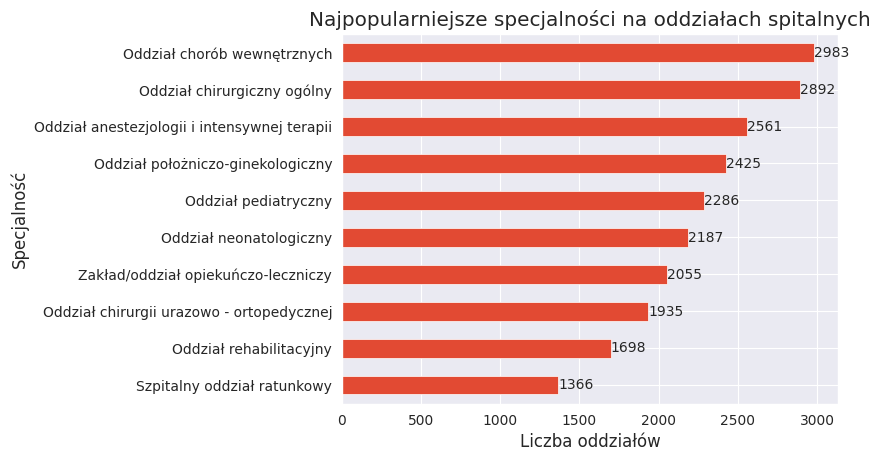

In [62]:
ax = df['specjalnosc'].value_counts().head(10).sort_values().plot.barh(title="Najpopularniejsze specjalności na oddziałach spitalnych")
for container in ax.containers:
	ax.bar_label(container)
ax.set_ylabel("Specjalność")
ax.set_xlabel("Liczba oddziałów")

Text(0.5, 0, 'łóżka na koniec roku')

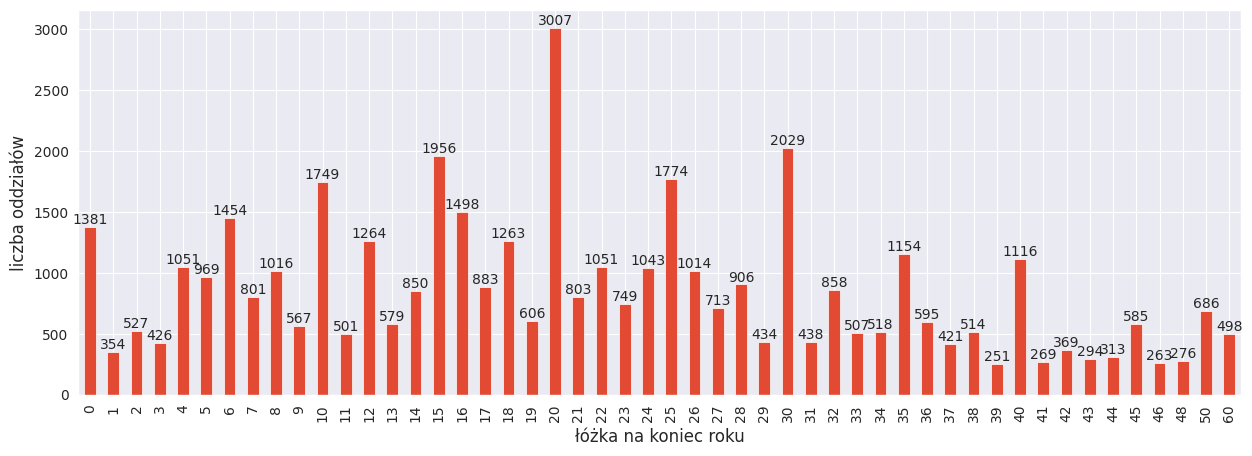

In [80]:
ax = df['liczba_lozek_na_koniec_roku'].value_counts().head(50).sort_index().plot.bar(figsize=(15, 5))
for container in ax.containers:
	ax.bar_label(container)
ax.set_ylabel("liczba oddziałów")
ax.set_xlabel("łóżka na koniec roku")

In [70]:
df.dtypes

rok                              int64
wojewodztwo                     object
powiat                          object
gmina                           object
poziom_sieci                    object
rodzaj_swiadczen                object
specjalnosc                     object
liczba_oddzialow                 int64
liczba_lozek_na_koniec_roku      int64
srednioroczna_liczba_lozek     float64
dtype: object

2. Loading data

In [ ]:
beds_df = pd.read_csv("data/Specjalnosci_lozka.csv")
beds_df.head()

3. Data description

In [ ]:
print(beds_df.dtypes)
beds_df.describe()

4. Removing null values

In [ ]:
def display_distinct_values(column: str) -> None:
	print(list(set(list(beds_df[column]))))

5. Adjusting data types

In [ ]:
beds_df['Średnioroczna liczba łóżek'] = beds_df['Średnioroczna liczba łóżek'].astype(str).str.replace(',', '.')

In [ ]:
beds_df = beds_df.astype({'Liczba oddziałów': 'int64', 'Liczba łóżek 31.12': 'int64', 'Średnioroczna liczba łóżek': 'float64'})

In [ ]:
beds_df

6. Plots

In [ ]:
beds_df.hist(figsize=(15, 15), bins=50, xlabelsize=10, ylabelsize=10)

In [ ]:
df = beds_df.loc[beds_df['Rok'] == 2023, ['Województwo', 'Liczba oddziałów']].groupby('Województwo').agg({'Liczba oddziałów': 'sum'})
df = df.sort_values('Liczba oddziałów', ascending=False)
df.plot(kind='bar', figsize=(10,5))
plt.title('Liczba oddziałów na województwo')
plt.ylabel('Liczba oddziałów')
plt.xlabel('Województwo')

In [ ]:
print(beds_df.loc[beds_df['Rok'] == 2023].groupby('Województwo')['Liczba oddziałów'].sum().sort_values())

In [ ]:
df = beds_df.loc[beds_df['Rok'] == 2023, ['Województwo', 'Liczba łóżek 31.12']].groupby('Województwo').agg({'Liczba łóżek 31.12': 'sum'})
df = df.sort_values('Liczba łóżek 31.12', ascending=False)
df.plot(kind='bar', figsize=(10,5))
plt.title('Liczba łóżek na województwo (stan na 31.12.2023')
plt.ylabel('Liczba łóżek 31.12')
plt.xlabel('Województwo')

mapka

In [ ]:
beds_df